In [1]:
import yahooquery as yq
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# sc = yq.Screener()
# data = sc.get_screeners('all_cryptocurrencies_us', count = 250)
# crypto_dict = data['all_cryptocurrencies_us']['quotes']
# tickers = [d['symbol'] for d in crypto_dict]
# start_ = '2019-03-01'
# tickers[:5]
# end_ = '2021-12-31'
# for t in tickers:
#     try:
#         df = pdr.get_data_yahoo(t,start = start_, end = end_)
#         df.to_csv(f"data/{t}.csv")
#         print(f'{t} is collected')
#     except:
#         print(f'no data {t}')

In [3]:
file_list = os.listdir('data')
tickers = [file_name[:-4] for file_name in file_list] #확장자 제거

In [22]:
date_range = pd.date_range(start="2019-02-28",end="2021-12-31")
def get_price_data(tickers):
    df_asset = pd.DataFrame()
    mdd_df = pd.DataFrame(columns = ['Mdd','Count'])
    for t in tickers:
        df = pd.read_csv(f'data/{t}.csv')
        if df.shape[0] >= len(date_range): #3년간의 데이터
            adj_price = pd.Series(data = df['Adj Close'])
            df_asset[t] = adj_price
            pct_change = (df['High'] - df['Low']) / df['Open'] * 100
            roll_max = adj_price.max()
            draw_down = adj_price / roll_max - 1
            mdd = draw_down.min() * 100
            mdd_df.loc[t,'Mdd'] = mdd
            mdd_df.loc[t,'Count'] = pct_change[pct_change > 5].count()
    df_asset.index = date_range
    return df_asset, mdd_df

df_asset, mdd_df = get_price_data(tickers)
tickers = df_asset.columns
df_asset

,USDT-USD,PIVX-USD,ZEN-USD,GLM-USD,GAS-USD,STRAX-USD,TRX-USD,ZIL-USD,ICX-USD,FTM-USD,...,VET-USD,IOTX-USD,SNX-USD,DAG-USD,BTG-USD,CRO-USD,THETA-USD,ERG-USD,NMR-USD,STMX-USD
2019-02-28,1.010067,0.738864,5.614676,0.064431,2.405442,0.869479,0.023867,0.017139,0.290499,0.003809,...,0.004596,0.007617,0.058027,0.001222,12.636540,0.012587,0.144503,2.094997,4.324895,0.002743
2019-03-01,1.006868,0.757598,5.505803,0.066629,2.456284,0.878254,0.023726,0.017260,0.294063,0.003953,...,0.004597,0.007903,0.046903,0.001255,12.678119,0.012510,0.140232,3.050655,4.475566,0.002742
2019-03-02,1.011416,0.752879,5.649797,0.066988,2.446808,0.877114,0.022937,0.017261,0.281907,0.003903,...,0.004520,0.007903,0.045330,0.001337,12.534415,0.012522,0.140663,2.815295,4.522693,0.002743
2019-03-03,1.010220,0.764209,5.325472,0.066234,2.428196,0.873582,0.022723,0.017008,0.282740,0.003944,...,0.004454,0.007907,0.043409,0.001335,12.313227,0.012602,0.130959,2.664491,4.781655,0.002797
2019-03-04,1.011617,0.783176,5.209386,0.064142,2.307911,0.829559,0.022937,0.016342,0.269822,0.003869,...,0.004254,0.008005,0.041785,0.001269,11.093423,0.012400,0.123305,1.854411,4.594988,0.002956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.999944,0.589942,70.509506,0.493663,6.594275,1.599196,0.081002,0.078950,1.553299,2.192834,...,0.097409,0.147372,6.432128,0.187453,45.646770,0.624088,5.469887,5.393758,34.616550,0.024301
2021-12-28,1.001168,0.551630,63.439892,0.455438,6.059520,1.450263,0.077259,0.075295,1.773610,2.231060,...,0.087712,0.127689,5.853951,0.176196,42.107834,0.566971,5.089115,5.088685,33.554886,0.022019
2021-12-29,1.000294,0.548861,61.649487,0.428790,5.803537,1.364987,0.076466,0.080259,1.424557,2.127730,...,0.082472,0.121274,5.443351,0.179801,40.727913,0.546568,4.904891,4.940927,31.593966,0.021295
2021-12-30,1.001036,0.558266,61.636074,0.432530,5.856277,1.400568,0.077924,0.078441,1.263231,2.106925,...,0.084780,0.124305,5.554381,0.197810,41.119080,0.553711,4.816831,4.947454,32.104332,0.021560


In [23]:
mdd_df.sort_values(by='Mdd', ascending=False,inplace=True)
mdd_df

,Mdd,Count
TUSD-USD,-7.017525,12
USDC-USD,-7.078826,11
USDT-USD,-7.5302,12
WICC-USD,-84.671246,769
BTM-USD,-86.898631,776
...,...,...
XDC-USD,-99.77633,980
SNX-USD,-99.845634,933
FTM-USD,-99.927687,952
XWC-USD,-99.940877,700


In [24]:
mdd_df.mean()

Mdd      -94.214513
Count    791.099338
dtype: float64

In [7]:
mdd_df.loc['BTC-USD']

Mdd     -94.432835
Count          386
Name: BTC-USD, dtype: object

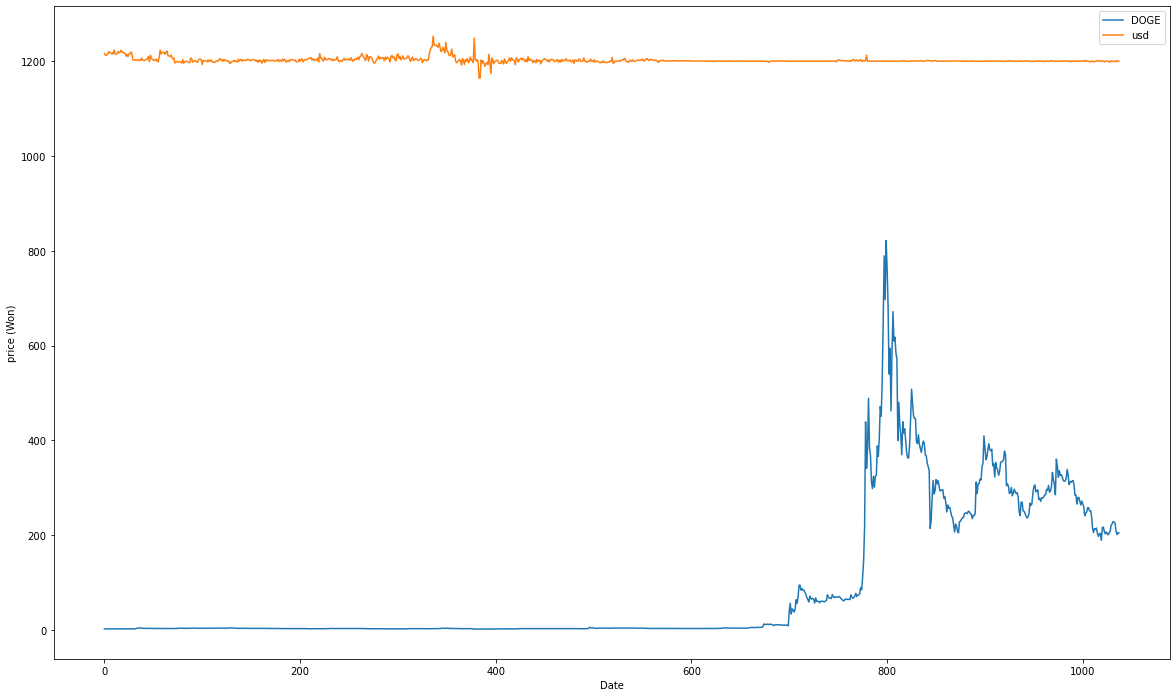

In [8]:
doge = pd.read_csv('data/DOGE-USD.csv')
usd = pd.read_csv('data/USDC-USD.csv')
plt.figure(figsize=(20,12))
plt.plot(doge['Close']*1200,label='DOGE')
plt.plot(usd['Close']*1200,label ='usd')
plt.xlabel('Date')
plt.ylabel('price (Won)')
plt.legend()

실상 4개를 제외하곤 전부 공격적인 코인, 3일에 한번 리밸런싱을 실시 그외의 전략들은 전부 vaa와 흡사. <br>
* 공격자산: stable 코인 4개를 제외한 전부
* 방어자산: stable 코인

In [25]:
defensive_coins = mdd_df[:3].index
aggresive_coins = mdd_df[4:].index

In [10]:
def get_momentum(asset):
    momentum = pd.Series(index=asset.index,dtype='float64')
    try:
        moment_1d = asset.rolling(window = 1, min_periods=1).mean()
        moment_3d = asset.rolling(window = 3, min_periods=1).mean()
        moment_6d = asset.rolling(window = 6, min_periods=1).mean()
        moment_9d = asset.rolling(window = 9, min_periods=1).mean()
        momentum = moment_1d * 6 + moment_3d * 4 + moment_6d * 2 + moment_9d 
    except: 
        pass
    return momentum


In [18]:
pct = df_asset.pct_change() * 100
pct = pct.iloc[1:,::]
pct = pct.fillna(0)
moment_df = pct.apply(get_momentum)

비트,이더, 바이낸스, 카르다노,리플의 모멘텀이 전부 음의 수익률이면 테더로 도망친다.

In [26]:
def select_asset(row):
    canaria = ['BTC-USD','BNB-USD','XRP-USD','ADA-USD']
    canaria_momentum = row[canaria]
    defensive_momentum = row.loc[defensive_coins]
    aggresive_momentum = row.loc[aggresive_coins]
    if canaria_momentum.cumprod()[-1] >= 0:
        selected = aggresive_momentum.index[aggresive_momentum == max(aggresive_momentum)]
    else:
        selected = defensive_momentum.index[defensive_momentum == max(defensive_momentum)]
    return selected

selected_asset = moment_df.T.apply(select_asset).T

In [32]:
selected_asset.columns=['Asset']
selected_asset

,Asset
2019-03-01,ERG-USD
2019-03-02,RVN-USD
2019-03-03,USDC-USD
2019-03-04,USDC-USD
2019-03-05,ERG-USD
...,...
2021-12-27,USDC-USD
2021-12-28,MLN-USD
2021-12-29,GXC-USD
2021-12-30,SYS-USD


In [28]:
selected_asset[selected_asset['Asset'].isin(defensive_coins)]

,Asset
2019-03-03,USDC-USD
2019-03-04,USDC-USD
2019-03-06,TUSD-USD
2019-03-07,TUSD-USD
2019-03-10,USDC-USD
...,...
2021-12-12,USDT-USD
2021-12-14,USDT-USD
2021-12-24,USDT-USD
2021-12-26,USDT-USD


In [39]:
pct

,USDT-USD,PIVX-USD,ZEN-USD,GLM-USD,GAS-USD,STRAX-USD,TRX-USD,ZIL-USD,ICX-USD,FTM-USD,...,VET-USD,IOTX-USD,SNX-USD,DAG-USD,BTG-USD,CRO-USD,THETA-USD,ERG-USD,NMR-USD,STMX-USD
2019-03-01,-0.316710,2.535511,-1.939077,3.411407,2.113626,1.009225,-0.590775,0.705988,1.226855,3.780524,...,0.021753,3.754763,-19.170386,2.700493,0.329032,-0.611741,-2.955648,45.616199,3.483807,-0.036457
2019-03-02,0.451693,-0.622884,2.615311,0.538803,-0.385784,-0.129803,-3.325465,0.005795,-4.133811,-1.264866,...,-1.675003,0.000000,-3.353730,6.533868,-1.133476,0.095924,0.307349,-7.715062,1.052990,0.036470
2019-03-03,-0.118241,1.504883,-5.740473,-1.125573,-0.760670,-0.402683,-0.932987,-1.465739,0.295489,1.050482,...,-1.460178,0.050614,-4.237807,-0.149590,-1.764650,0.638873,-6.898754,-5.356598,5.725829,1.968654
2019-03-04,0.138276,2.481917,-2.179826,-3.158493,-4.953679,-5.039364,0.941774,-3.915804,-4.568860,-1.901631,...,-4.490349,1.239400,-3.741158,-4.943823,-9.906451,-1.602914,-5.844580,-30.402803,-3.903815,5.684655
2019-03-05,-0.045757,0.641493,6.950341,2.856153,5.219440,3.755486,4.621353,3.959130,6.908627,10.183516,...,2.961919,8.981894,29.685289,-5.673756,13.002754,6.072576,3.361586,42.103290,0.867887,-0.608928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.050474,1.947560,0.367507,-2.203889,1.248511,3.851107,-0.703639,2.954990,0.827754,-6.407659,...,3.051045,5.429138,2.986271,-8.279876,1.368205,-0.287914,-0.665576,2.350596,0.608885,-0.990061
2021-12-28,0.122411,-6.494191,-10.026470,-7.743141,-8.109386,-9.312988,-4.620874,-4.629514,14.183428,1.743230,...,-9.954937,-13.355999,-8.988891,-6.005243,-7.752874,-9.152073,-6.961234,-5.656034,-3.066928,-9.390557
2021-12-29,-0.087302,-0.501966,-2.822207,-5.851068,-4.224475,-5.880037,-1.026411,6.592737,-19.680371,-4.631437,...,-5.974098,-5.023927,-7.014069,2.046022,-3.277112,-3.598602,-3.619964,-2.903658,-5.843919,-3.288073
2021-12-30,0.074186,1.713541,-0.021756,0.872218,0.908758,2.606691,1.906725,-2.265168,-11.324639,-0.977797,...,2.798530,2.499299,2.039738,10.016069,0.960439,1.306886,-1.795349,0.132100,1.615392,1.244425


In [47]:
selected_asset.values

array([['ERG-USD'],
       ['RVN-USD'],
       ['USDC-USD'],
       ...,
       ['GXC-USD'],
       ['SYS-USD'],
       ['FUN-USD']], dtype=object)

In [97]:
value_change = []
for i,v in zip(pct.index[1:], selected_asset['Asset']):
    value_change.append(pct.loc[i,v] / 100)
value_change


[-0.07715061709020765,
 0.2212949667898847,
 0.003466460723222431,
 0.0013412002997246208,
 -0.2533175478084987,
 -0.0012305783389315872,
 0.0015280935662722595,
 -0.050133001935578125,
 -0.13415488967291078,
 -0.005771367641544289,
 -0.16271414802367368,
 0.12195984683025163,
 0.0006178310648052854,
 0.0002143881276097659,
 0.0045849771799999495,
 0.09873702267709739,
 -0.003973685878389199,
 0.11111108116889866,
 -0.003405190514325418,
 0.001166663344015717,
 -0.09561669007943696,
 -0.1444506349374658,
 0.05503866718824679,
 -0.01637634185881154,
 -0.0003010796376829994,
 -0.06223900484352562,
 0.18443925167480082,
 -0.012223335869997576,
 -0.056873108394210996,
 0.5987968691023882,
 -0.5121951262795703,
 0.1900347944221028,
 0.2634957667067781,
 -0.0020654226407758047,
 -0.00154756290182112,
 -0.03000001091398896,
 -0.14712768568578605,
 -0.12190631773133598,
 -0.0011199245554357473,
 -0.0002379692311127446,
 0.0014449697244438564,
 0.27237251542634633,
 -0.5250000090949473,
 -0.003

In [102]:
seed = 1000
my_profit = np.zeros(len(value_change))
my_profit[0] = seed
for i in range(1,len(value_change)):
    my_profit[i] = my_profit[i-1] + my_profit[i-1] * value_change[i-1] 

In [103]:
my_profit

array([1.00000000e+03, 9.22849383e+02, 1.12707131e+03, ...,
       5.52005564e-22, 4.15302158e-22, 3.49214601e-22])

In [112]:
res = pd.DataFrame()
res['pct'] = np.array(value_change) * 100
res['profit'] = my_profit.round(2)
res['select'] = selected_asset.values[:-1]
res.index = pct.index[:-1]
res


,pct,profit,select
2019-03-01,-7.715062,1000.00,ERG-USD
2019-03-02,22.129497,922.85,RVN-USD
2019-03-03,0.346646,1127.07,USDC-USD
2019-03-04,0.134120,1130.98,USDC-USD
2019-03-05,-25.331755,1132.50,ERG-USD
...,...,...,...
2021-12-26,-0.050474,0.00,USDT-USD
2021-12-27,0.125956,0.00,USDC-USD
2021-12-28,-24.764860,0.00,MLN-USD
2021-12-29,-15.913127,0.00,GXC-USD


In [113]:
res[res['profit'] == 0]

,pct,profit,select
2019-10-17,-0.145539,0.0,USDC-USD
2019-10-18,-1.381076,0.0,SOLVE-USD
2019-10-19,-0.393792,0.0,USDT-USD
2019-10-20,0.208404,0.0,USDC-USD
2019-10-21,0.038509,0.0,TUSD-USD
...,...,...,...
2021-12-26,-0.050474,0.0,USDT-USD
2021-12-27,0.125956,0.0,USDC-USD
2021-12-28,-24.764860,0.0,MLN-USD
2021-12-29,-15.913127,0.0,GXC-USD


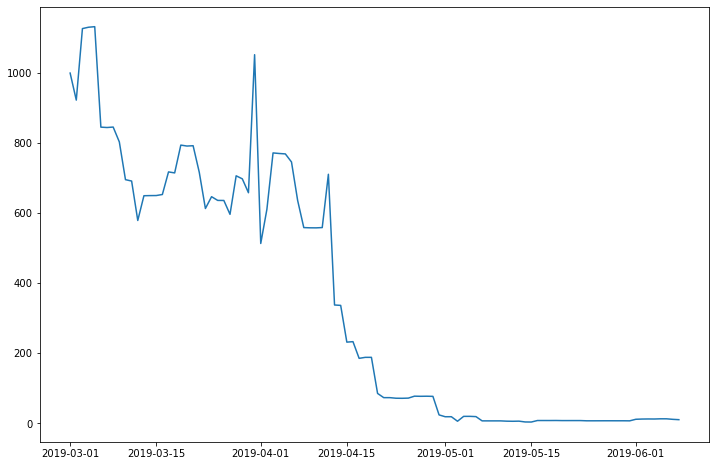

In [117]:
plt.figure(figsize=(12,8))
plt.plot(res['profit'][:100])